Лабораторна робота №3


Тема: регресійний аналіз

Завдання: 
1. Створити набір даних за допомогою DatasetGenerator.
2. Завантажити набір даних для класифікації з сайту Kaggle. Кожен студент має обрати унікальний набір даних.
3. (Опціонально для отримання відмінної оцінки) Згенерувати набір даних для класифікації, використовуючи стандартні можливості Python (наприклад, з допомогою бібліотек Numpy або random).
4. Провести моделювання для отриманих наборів даних з використанням регресійного аналізу.
5. Викласти результати на GitHub у власний репозиторій в основну гілку в папці Lab3.


In [6]:
#Завдання №1
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Налаштування параметрів для генерації даних
num_samples = 800  # Кількість зразків
num_features = 12  # Кількість ознак
num_classes = 3    # Кількість класів
random_state = 123 # Випадковий стан для відтворюваності

# Генерація штучного набору даних
X, y = make_classification(n_samples=num_samples,
                           n_features=num_features,
                           n_classes=num_classes,
                           n_informative=8,  # Кількість інформативних ознак
                           n_redundant=2,     # Кількість надмірних ознак
                           n_clusters_per_class=2,
                           random_state=random_state)

# Створення DataFrame для зручного аналізу
data_frame = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, num_features + 1)])
data_frame['Label'] = y

# Виведення перших рядків набору даних
print(data_frame.head())



   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.078218   4.591296   0.765099  -0.216993  -4.049329   2.098097   
1   1.634373   1.190376   1.310348   3.443634  -1.998066   2.163621   
2   1.858443   0.973120   3.540939  -1.980725   4.155352  -1.149957   
3  -2.158871  -0.641206  -1.487784   1.373898  -1.189481  -1.178399   
4   2.736225   2.068841   2.097424   0.552934  -2.283217   0.170055   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  Label  
0   4.757160  -3.497980   6.627446    2.681122    0.299843    0.687661      0  
1  -3.327355   0.694103  -0.229657   -0.167984   -0.483051    1.248892      2  
2   0.150822  -2.400806  -0.510955    1.091581    0.061995    0.385503      0  
3   0.002903  -1.456071   1.947354    2.393122   -1.846427   -0.224283      1  
4  -0.619317  -0.186813  -2.353057   -0.458958    0.137944    1.190690      0  


In [9]:
#Завдання №2
import pandas as pd

df = pd.read_csv('sampleSubmission.csv')  # Змініть на фактичний шлях до файлу
print(df.head())




   id           label
0   0  Apple Braeburn
1   1  Apple Braeburn
2   2  Apple Braeburn
3   3  Apple Braeburn
4   4  Apple Braeburn


In [16]:
#Завадння №3
import numpy as np
import pandas as pd
import random

# Встановлюємо випадковий генератор для відтворюваності
np.random.seed(42)
random.seed(42)

# Кількість зразків
n_samples = 1000

# Генерація ваги (наприклад, в грамах)
weights = np.random.normal(loc=150, scale=30, size=n_samples)  # Середня вага 150 г, стандартне відхилення 30 г

# Генерація кольору (випадковий вибір)
colors = np.random.choice(['red', 'yellow', 'orange'], size=n_samples)

# Генерація класів фруктів на основі ваги і кольору
classes = []
for i in range(n_samples):
    if colors[i] == 'red' and weights[i] < 180:
        classes.append('apple')
    elif colors[i] == 'yellow' and weights[i] < 160:
        classes.append('banana')
    elif colors[i] == 'orange':
        classes.append('orange')
    else:
        classes.append('unknown')  # Для випадків, які не відповідають опису

# Створення DataFrame
fruit_data = pd.DataFrame({
    'Weight': weights,
    'Color': colors,
    'Class': classes
})

# Вивід перших 5 рядків синтетичного набору даних
print(fruit_data.head())

# Збереження даних у CSV файл
fruit_data.to_csv('synthetic_fruit_classification.csv', index=False)





       Weight   Color    Class
0  164.901425  orange   orange
1  145.852071     red    apple
2  169.430656  orange   orange
3  195.690896     red  unknown
4  142.975399  orange   orange


MSE: 3392.543444816861; MAE: 46.45582999841314; R2: 0.9776270996803006


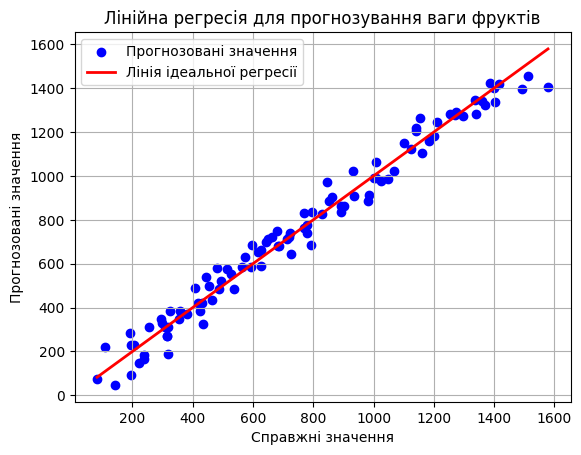

In [21]:
#Завадння №4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Генерація даних для фруктів
np.random.seed(42)
n_samples = 100

# Вага (в грамах) фрукта
weight = np.random.randint(100, 1000, n_samples)  # Вага від 100 до 1000 грамів

# Створення кольору фрукта (0 - червоний, 1 - жовтий)
colors = np.random.choice(['red', 'yellow'], n_samples)  # Виправлено, щоб виключити зелений

# Створення зв'язку між кольором та вагою
# Залежність: червоні фрукти важчі, жовті - середня вага
color_weights = {'red': 1.5, 'yellow': 1.2}
y = weight * np.array([color_weights[color] for color in colors]) + np.random.normal(0, 50, n_samples)

# Створення DataFrame
df = pd.DataFrame({'Weight': weight, 'Color': colors, 'y': y})

# Виконання one-hot кодування для кольору
df = pd.get_dummies(df, columns=['Color'], drop_first=True)

# Удалити/закоментувати наступний рядок, щоб не виводити стовпці
# print("Стовпці в датафреймі після one-hot кодування:", df.columns)

# Розділення на незалежну (X) та залежну (y) змінні
X = df[['Weight', 'Color_yellow']]  # Використовуємо Color_yellow замість Color_green
y = df['y']

# Створення моделі лінійної регресії
model = LinearRegression()

# Навчання моделі
model.fit(X, y)

# Прогнозування
y_pred = model.predict(X)

# Оцінка моделі
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Виведення результатів
print(f"MSE: {mse}; MAE: {mae}; R2: {r2}")

# Візуалізація результатів
plt.scatter(y, y_pred, color='blue', label='Прогнозовані значення')  # точковий графік
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Лінія ідеальної регресії')  # лінія ідеальної регресії
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія для прогнозування ваги фруктів')
plt.legend()
plt.grid(True)
plt.show()



Висновок: у цій лабораторній роботі я ознайомилася  з методами регресійного аналізу, навчилася працювати з реальними і штучно створеними наборами даних для класифікації, застосовувати моделі для класифікації даних та аналізувати результати.